In [1]:
from cad.calc.geo import Geo
from cad.calc.didgmo import PeakFile, didgmo_bridge
from cad.calc.visualization import DidgeVisualizer, FFTVisualiser
import matplotlib.pyplot as plt
from cad.calc.conv import note_to_freq, note_name
from IPython.display import clear_output
import math
import random
import copy
from tqdm import tqdm

shape=[
    [0, 32], 
    [600, 32], 
    [700, 50], 
    [800, 40], 
    [1150, 40], 
    [1250, 60], 
    [1350, 42], 
    [1700, 45], 
    [1800, 65], 
    [1900, 70], 
    [2000, 75]
]


def loss(target, peak):
    l=0.0
    for i in range(len(target)):
        l1 = target[i] - peak.impedance_peaks[i]["freq"]
        l+=l1*l1
    return l


class BubbleGeo:
    
    def __init__(self, l, d_mund, d_before_bell, d_bell, l_bell):
        self.l=l
        self.d_mund=d_mund
        self.d_bell=d_bell
        self.d_before_bell=d_before_bell
        self.l_bell=l_bell
        self.bubbles=[]
        
    def add_bubble(self, pos, width, height):
        self.bubbles.append({
            "pos": pos,
            "width": width,
            "height": height
        })
        self.bubbles.sort(key=lambda x : x["pos"])
        
    def make_geo(self):
        shape=[[0, self.d_mund]]
        
        gk=(self.d_before_bell-self.d_mund)/2
        winkel=math.atan(gk/self.l)
        
        for bubble in self.bubbles:
            x1=bubble["pos"]-bubble["width"]/2
            y1=self.d_mund + math.tan(winkel)*x1
            x3=bubble["pos"]+bubble["width"]/2
            y3=self.d_mund + math.tan(winkel)*x3
            
            shape.append([x1,y1])
            shape.append([bubble["pos"],bubble["height"]])
            shape.append([x3, y3])
        
        shape.append([self.l, self.d_before_bell])
        shape.append([self.l + self.l_bell, self.d_bell])
        
        return Geo(geo=shape)
    
    def copy(self):
        cop=BubbleGeo(self.l, self.d_mund, self.d_before_bell, self.d_bell, self.l_bell)
        cop.bubbles=copy.deepcopy(self.bubbles)
        return copy
    
    def reorder(self):
        if len(self.bubbles)==0:
            return
            
        b0=self.bubbles[0]
        
        if b0["pos"]-b0["width"]/2<0:
            b0["width"] = b0["pos"]*2
        
        for i in range(0, len(self.bubbles)-1):
            b0=self.bubbles[i]
            b1=self.bubbles[i+1]
            
            if b0["pos"]+b0["width"]/2 > b1["pos"]-b1["width"]/2:
                b0["width"]=(b1["pos"]-b0["pos"])*2
        
        
        
def visualize_evolution(geo, peak, fft, target):

    #print(shape)
    DidgeVisualizer.vis_didge(geo)
    plt.show()

    FFTVisualiser.vis_fft_and_target(fft, target)

    plt.show()

target=[-31, -19]

for t in target:
    freq=note_to_freq(t)
    name=note_name(t)
    print(f"target {name}, {freq}")
target=[note_to_freq(x) for x in target]


class Evolver:
    
    def __init__(self):
        self.operations=[]
        
    def mutate(self, operation, f, learning_rate=1.0):
        pass
    
    def get_random_operation(self):
        return self.operations[random.randint(0, len(self.operations)-1)]

class BubbleEvolver(Evolver):
    
    def __init__(self):
        self.operations=["change_pos", "change_height", "change_width"]
        
    def mutate(self, operation, f, learning_rate=1.0):
        
        i_bubble=random.randint(0, len(f.bubbles)-1)
        factor=1.0+((random.random()-0.5)* learning_rate)
        
        factor=-1
        i_bubble=1
        
        old_bubble=f.bubbles[i_bubble]
        
        if operation=="change_pos":
            f.bubbles[i_bubble]["pos"] *= factor
        elif operation=="change_height":
            f.bubbles[i_bubble]["height"] *= factor
        elif operation=="change_width":
            f.bubbles[i_bubble]["width"] *= factor
        else:
            raise Exception(f"unknown operation {operation}")
                        
        return f
                      
father=BubbleGeo(2000, 32, 48, 74, 200)
father.add_bubble(800, 200, 60)
father.add_bubble(1200, 200, 60)
evolver=BubbleEvolver()
mutant=evolver.mutate("change_pos", father.copy())
geo=mutant.make_geo()
peak, fft=didgmo_bridge(geo)
visualize_evolution(geo, peak, fft, target)
print(geo.geo)

target D1, 73.41619197935188
target D2, 146.8323839587038


AttributeError: module 'copy' has no attribute 'bubbles'

In [2]:
import random
from tqdm import tqdm

shape=[
    [0, 32], 
    [600, 32], 
    [700, 50], 
    [800, 40], 
    [1150, 40], 
    [1250, 60], 
    [1350, 42], 
    [1700, 45], 
    [1800, 65], 
    [1900, 70], 
    [2000, 75]
]

target=[-31, -19]
for t in target:
    freq=note_to_freq(t)
    name=note_name(t)
    print(f"target {name}, {freq}")
target=[note_to_freq(x) for x in target]

geo=Geo(geo=shape)

c=0
n_iterations=1000
loss=1000000
visualize_evolution(geo, peak, fft, target)
with tqdm(total=n_iterations) as pbar:
    
    for i in range(n_iterations):
        
        try:
            mutation_operation=mutation_operations[random.randint(0, len(mutation_operations)-1)]
            mutant=mutate(geo, mutation_operation)
            peak, fft=didgmo_bridge(mutant)
            mutant_loss=loss_overblow_freqs(peak, target)

            if mutant_loss < loss:
                loss=mutant_loss
                geo=mutant
                clear_output(wait=True)
                visualize_evolution(geo, peak, fft, target)
                peak.print_impedance_peaks()
        except Exception:
            pass

        pbar.update(1)
        pbar.set_description(f"iteration={i}, loss={loss}")


target D1, 73.41619197935188
target D2, 146.8323839587038


NameError: name 'peak' is not defined

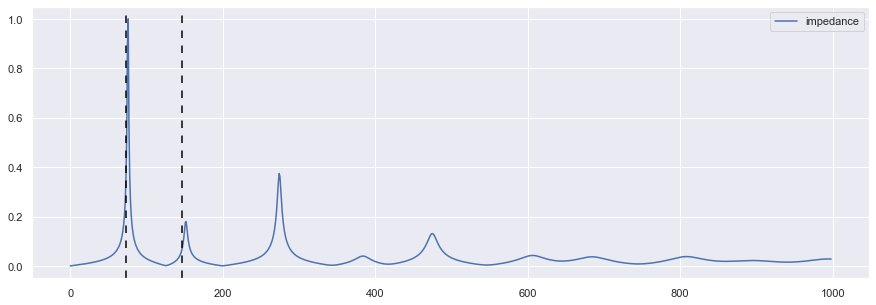

{D#2|077|-18}, {D#3|153|-29}, {C#4|275|-14}, {G4|385|-32}, {A#5|476|36}, {D#5|607|-43}, {F5|685|-34}, {G#5|809|-46}, {A6|895|29}, {H6|995|12}


In [100]:
mutation_operations=["change_length", "change_segment_diameter", "change_segment_position"]

def loss_overblow_freqs(peak, target):
    loss=0
    for i in range(len(target)):
        loss += abs(target[i] - peak.impedance_peaks[i]["freq"])
    return loss   

def mutate(geo, operation, learning_rate):

    if operation=="change_length":
        factor=(1+((random.random()-0.5))*0.1*learning_rate)
        geo.stretch(factor)
        
    elif operation=="change_segment_diameter":
        factor=(1+((random.random()-0.5))*learning_rate)
        segment=random.randint(0, len(geo.geo)-1)        
        if segment==0:
            return mutate(geo, operation, learning_rate)
        geo.geo[segment][1]*=factor
        
    elif operation=="change_segment_position":
        factor=(1+((random.random()-0.5))*learning_rate)
        segment=random.randint(0, len(geo.geo)-1)
        geo.geo[segment][0]*=factor
        
    else:
        raise Exception("unknown operation " + str(operation))
        
    return geo

def evolve(geo, target):
    
    generation_size=10
    n_generations=100
    mutation_operations={
        "change_length": 0.1,
        "change_segment_diameter": 0.55,
        "change_segment_position": 1
    }
        
    peak, fft=didgmo_bridge(geo)
    father_loss=loss_overblow_freqs(peak, target)
    
    best_loss=father_loss
    best_geo=geo
    
    DidgeVisualizer.vis_didge(geo)
    plt.show()

    FFTVisualiser.vis_fft_and_target(fft, target)

    plt.show()
    
    with tqdm(total=n_generations*generation_size, bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}') as pbar:

        for i_gen in range(n_generations):

            loss_before_mutate=best_loss
            
            ?=
            mutation_operation=mutation_operations[random.randint(0, len(mutation_operations)-1)]
            mutant=geo.copy()
            mutant=mutate(mutant, mutation_operation, 1)
            peak, fft=didgmo_bridge(mutant)

            #peak.print_impedance_peaks()

            mutant_loss=loss_overblow_freqs(peak, target)
            if mutant_loss<best_loss:
                best_geo=mutant
                best_loss=mutant_loss
                DidgeVisualizer.vis_didge(best_geo)
                clear_output(wait=True)
                plt.show()

                FFTVisualiser.vis_fft_and_target(fft, target)

                plt.show()


            pbar.update(1)
            pbar.set_description(f"generation={i_gen}, loss={best_loss:.2f}, loss_diff={loss_before_mutate-best_loss}")
            loss_diff=loss_before_mutate-best_loss        
    return best_geo, best_loss

def make_random_shape():
    n_segments=30
    length=1000 + random.random()*1000
    shape=[]
    d1=32
    widening_factor=1+4*random.random()
    for i in range(n_segments+1):
        x=i*length/n_segments
        y=d1
        if i>n_segments*0.8:
            y*=1+(i-n_segments*0.8)/(n_segments*0.8)*widening_factor
        shape.append([x, y])
    return shape



target=[-31, -19]

for t in target:
    freq=note_to_freq(t)
    name=note_name(t)
    print(f"target {name}, {freq}")
target=[note_to_freq(x) for x in target]

n_generations=100
n_candidates=100

best_geo=None
best_loss=None
mutation_operations={
    "change_length": 0.1,
    "change_segment_diameter": 0.55,
    "change_segment_position": 1
}
with tqdm(total=n_generations*n_candidates, bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}') as pbar:
    for i_candidate in range(n_candidates):
        
        shape=make_random_shape()
        father=Geo(geo=shape)
            
        best_mutant_loss=None
        best_mutant=father
        for i_generation in range(n_generations):
            m_random=random.random()
            mutant_operation=None
            for key in list(reversed(list(mutation_operations.keys()))):
                if m_random>mutation_operations[key]:
                    break
                mutant_operation=key            
            mutant=father.copy()
            mutant=mutate(mutant, mutant_operation, 1)
            peak, fft=didgmo_bridge(mutant)

            mutant_loss=loss_overblow_freqs(peak, target)
            if best_mutant_loss==None or mutant_loss<best_mutant_loss:
                best_mutant=mutant
                best_mutant_loss=mutant_loss
                DidgeVisualizer.vis_didge(best_mutant)

                clear_output(wait=True)
                plt.show()
                FFTVisualiser.vis_fft_and_target(fft, target)
                plt.show()

                if best_loss == None or mutant_loss<best_loss:
                    best_geo=best_mutant
                    best_loss=mutant_loss


            pbar.update(1)
            pbar.set_description(f"generation={i_generation}, candidate={i_candidate}, mutant_loss={best_mutant_loss:.2f}, overall best loss={best_loss:.2f}")


peak, fft=didgmo_bridge(best_geo)

clear_output(wait=True)
plt.show()
FFTVisualiser.vis_fft_and_target(fft, target)
plt.show()

peak.print_impedance_peaks()

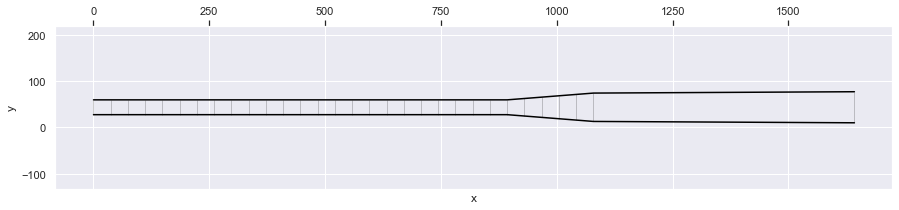

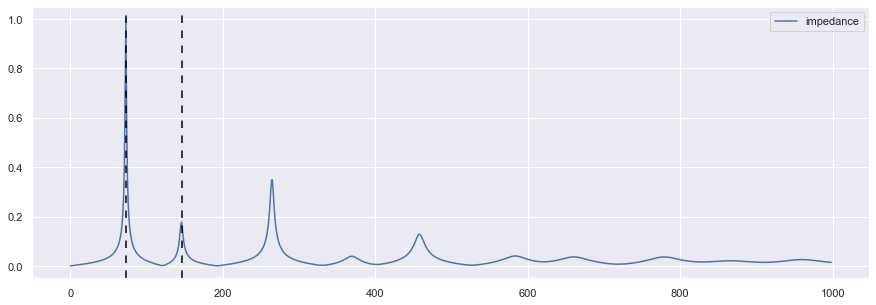

generation=999, candidate=99, mutant_loss=0.75, overall best loss=9.75:   1%|▎                             | 1000/100000 [01:01<1:41:22, 16.28it/s]


(<cad.calc.geo.Geo at 0x7fdbd537b8b0>, 0.7514240619443342)

In [113]:
def evolve_mutant(father, n_generations, target):
    
    best_mutant_loss=None
    best_mutant=None
    with tqdm(total=n_generations*n_candidates, bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}') as pbar:
        for i_generation in range(n_generations):
            m_random=random.random()
            mutant_operation=None
            for key in list(reversed(list(mutation_operations.keys()))):
                if m_random>mutation_operations[key]:
                    break
                mutant_operation=key            
            mutant=father.copy()
            mutant=mutate(mutant, mutant_operation, 1)
            peak, fft=didgmo_bridge(mutant)

            mutant_loss=loss_overblow_freqs(peak, target)
            if best_mutant_loss==None or mutant_loss<best_mutant_loss:
                best_mutant=mutant
                best_mutant_loss=mutant_loss
                DidgeVisualizer.vis_didge(best_mutant)

                clear_output(wait=True)
                plt.show()
                FFTVisualiser.vis_fft_and_target(fft, target)
                plt.show()

            pbar.update(1)
            pbar.set_description(f"generation={i_generation}, candidate={i_candidate}, mutant_loss={best_mutant_loss:.2f}, overall best loss={best_loss:.2f}")

    return best_mutant, best_mutant_loss
evolve_mutant(best_geo, 1000, target)

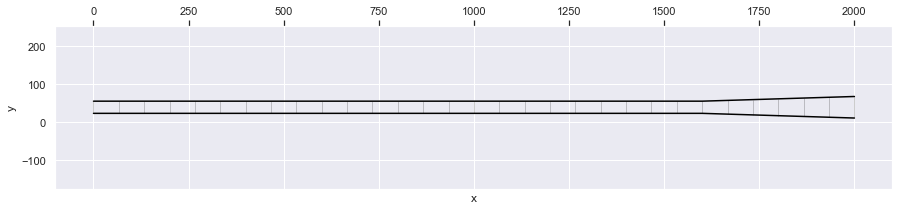

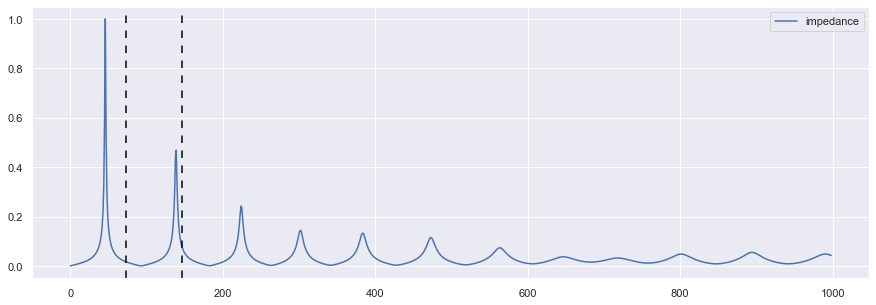

{F#1|047|27}, {C#3|140|17}, {A4|225|38}, {D#4|303|-46}, {G4|385|-32}, {A#5|474|28}, {C#5|564|29}, {E5|648|-30}, {F5|719|50}, {G5|802|39}, {A6|895|29}, {H6|991|05}


In [139]:
def random_bubble_shape():
    n_segments=30
    length=2000
    shape=[]
    d1=32
    widening_factor=1+4*random.random()
    widening_actor=4
    for i in range(n_segments+1):
        x=i*length/n_segments
        y=d1
        if i>n_segments*0.8:
            y*=1+(i-n_segments*0.8)/(n_segments*0.8)*widening_factor
        shape.append([x, y])
        
        n_bubbles=6
    return shape
geo=Geo(geo=random_bubble_shape())
peak, fft=didgmo_bridge(geo)
DidgeVisualizer.vis_didge(geo)
plt.show()
FFTVisualiser.vis_fft_and_target(fft, target)
plt.show()
peak.print_impedance_peaks()

In [234]:
from abc import ABC, abstractmethod

class MutationParameter:
    
    def __init__(self, name, value, minimum=None, maximum=None):
        self.name=name
        self.value=value
        self.minimum=minimum
        self.maximum=maximum
        
    def __repr__(self):
        return f"{self.name}={self.value}"


class MutationParameterSet(ABC):
    
    def __init__(self):
        self.mutable_parameters=[]
        self.immutable_parameters=[]
        
    @abstractmethod
    def make_geo():
        pass

    # overwrite for custom validation
    def validate():
        return True
    
    def copy(self):
        return copy.deepcopy(self)
    
    def get(self, name):
        
        ps=self.mutable_parameters + self.immutable_parameters
        for i in range(len(ps)):
            if ps[i].name == name:
                return ps[i]
        raise Exception("unknown parameter " + name)
            
    def mutate(self, learning_rate):
        for i in range(0, len(self.mutable_parameters)):
            p=self.mutable_parameters[i]
            
            r=(random.random()-0.5)*2
            c=p.maximum-p.value
            if r<0:
                c=p.value-p.minimum
            p.value += r*c

    def __repr__(self):
        return type(self).__name__ + "\n * " + "\n * ".join(str(x) for x in self.mutable_parameters + self.immutable_parameters)

         

class BasicShapeParameters(MutationParameterSet):
    
    def __init__(self):
        super(BasicShapeParameters, self).__init__()
        
        self.mutable_parameters.append(MutationParameter("length", 2000, 500, 3000))
        self.mutable_parameters.append(MutationParameter("d2", 45, 32, 100))
        self.mutable_parameters.append(MutationParameter("d3", 55, 32, 100))
        self.mutable_parameters.append(MutationParameter("d2_l", 1000, 500, 3000))
        self.mutable_parameters.append(MutationParameter("bell_size", 72, 50, 200))
        self.mutable_parameters.append(MutationParameter("bell_start", -200, -300, -20))
        self.immutable_parameters.append(MutationParameter("d1", 32))
        
    def make_geo(self):
        shape=[
            [0, self.get("d1").value],
            [self.get("d2_l").value, self.get("d2").value],
            [self.get("length").value + self.get("bell_start").value, self.get("d3").value],
            [self.get("length").value, self.get("bell_size").value]
        ]
        return Geo(geo=shape)
    
class Loss(ABC):
    
    @abstractmethod
    def get_loss(self):
        pass
    
def TargetNoteLoss(Loss):
    
    def __init__(self, targets):
        self.target_numbers=targets
        self.target_freqs=[note_to_freq(x) for x in targets]
        print("abc")
        print([note_name(t) for t in self.target_numbers])
    
    def __str__(self):
        ", ".join([note_name(t) for t in self.target_numbers])

loss=TargetNoteLoss([-20])
#bsp=BasicShapeParameters()
#geo=bsp.make_geo()
#DidgeVisualizer.vis_didge(geo)
#plt.show()
#FFTVisualiser.vis_fft_and_target(fft, target)
#plt.show()
#peak.print_impedance_peaks()

0.840976391687948


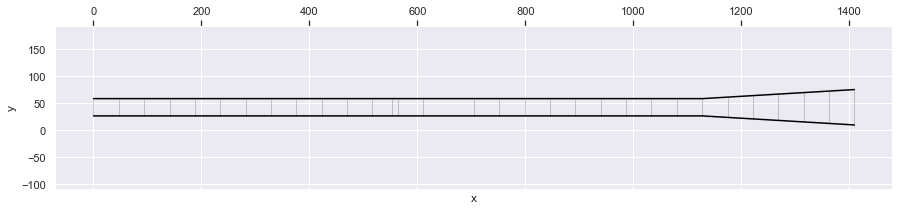

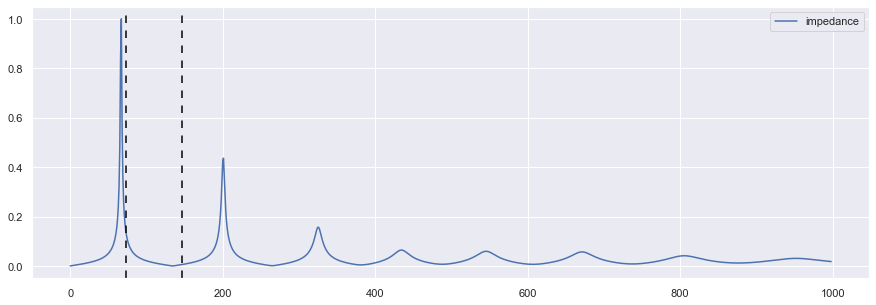

In [66]:
#shape=make_random_shape()
def mutate(geo, operation, learning_rate):

    if operation=="change_length":
        factor=(1+((random.random()-0.5))*0.1*learning_rate)
        geo.stretch(factor)
        
    elif operation=="change_segment_diameter":
        factor=(1+((random.random()-0.5))*learning_rate)
        segment=random.randint(0, len(geo.geo)-1)        
        if segment==0:
            return mutate(geo, operation, learning_rate)
        geo.geo[segment][1]*=factor
        
    elif operation=="change_segment_position":
        factor=(1+((random.random()-0.5))*learning_rate)
        print(factor)
        segment=random.randint(0, len(geo.geo)-1)
        geo.geo[segment][0]*=factor
        
    else:
        raise Exception("unknown operation " + str(operation))
        
    return geo




geo=Geo(geo=shape)
mutant=mutate(geo.copy(), "change_segment_position", 2)

peak, fft=didgmo_bridge(mutant)
visualize_evolution(mutant, peak, fft, target)



In [60]:
peak.print_impedance_peaks()

{C#2|068|-33}, {G#3|202|-48}, {E4|326|-20}, {A4|435|-20}, {C#5|546|-27}, {E5|672|33}, {G5|806|47}, {A#6|953|37}


In [42]:
for i in range(10):
    print(1+((random.random()-0.5)))

0.8375724947062599
0.7395231040804414
1.356626318135313
1.3992026821095658
1.257982294908616
1.0064587850869138
0.7277460498654278
1.3456450531816906
0.8594662937393591
1.0405893971974307
